In [1]:
print("This is for Jack's rough code")

This is for Jack's rough code


In [2]:
#libraries
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,ROYAL HOSPITAL,40,40,0,Open
1,2,2018-08-01 12:35:02,ROYAL HOSPITAL,40,40,0,Open
2,3,2018-08-01 12:40:02,ROYAL HOSPITAL,40,40,0,Open
3,4,2018-08-01 12:45:02,ROYAL HOSPITAL,40,40,0,Open
4,5,2018-08-01 12:50:02,ROYAL HOSPITAL,40,40,0,Open


In [4]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,DATE,BIKE.USAGE
0,1,2018-08-01 12:30:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
1,2,2018-08-01 12:35:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
2,3,2018-08-01 12:40:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
3,4,2018-08-01 12:45:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0
4,5,2018-08-01 12:50:02,ROYAL HOSPITAL,40,40,0,Open,2018-08-01,1.0


In [5]:
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]
dataMS = data[data.NAME == "MERRION SQUARE SOUTH"]
dataRH = data[data.NAME == "ROYAL HOSPITAL"]
print(len(dataPR))
print(len(dataMS))
print(len(dataRH))


342924
337762
342975


In [6]:
PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

MS_weekly_avg = dataMS.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
MS_date_vector = pd.DatetimeIndex(dataMS["DATE"].dt.date)

RH_weekly_avg = dataRH.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
RH_date_vector = pd.DatetimeIndex(dataRH["DATE"].dt.date)

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

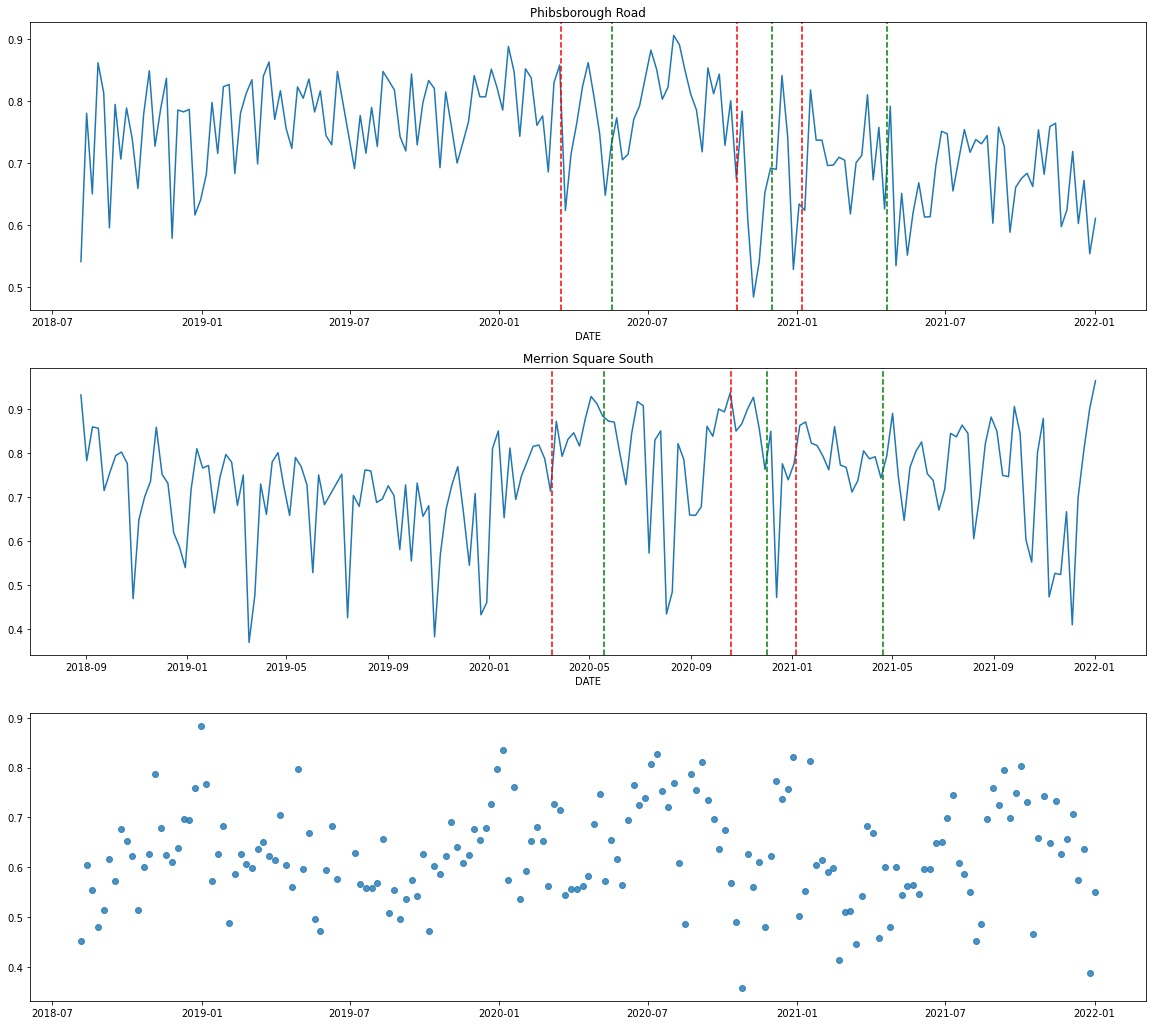

In [40]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = PR_weekly_avg.index, y = PR_weekly_avg.values)
axes[0].set_title('Phibsborough Road')
axes[0].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[0].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[1],x = MS_weekly_avg.index, y = MS_weekly_avg.values)
axes[1].set_title('Merrion Square South')
axes[1].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[1].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')
sns.lineplot(ax=axes[2],x = RH_weekly_avg.index, y = RH_weekly_avg.values)
axes[2].set_title("Royal Hospital")
axes[2].axvline(pd.to_datetime('2020-03-17'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-05-18'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-10-19'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2020-12-01'), color='green', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-01-06'), color='red', linestyle='--')
axes[2].axvline(pd.to_datetime('2021-04-21'), color='green', linestyle='--')


In [35]:
dictRH = {'week': range(179), 'avg': RH_weekly_avg.values}
regressionRH = pd.DataFrame(data=dictRH)
regressionRH = regressionRH.dropna()

<AxesSubplot:xlabel='week', ylabel='avg'>

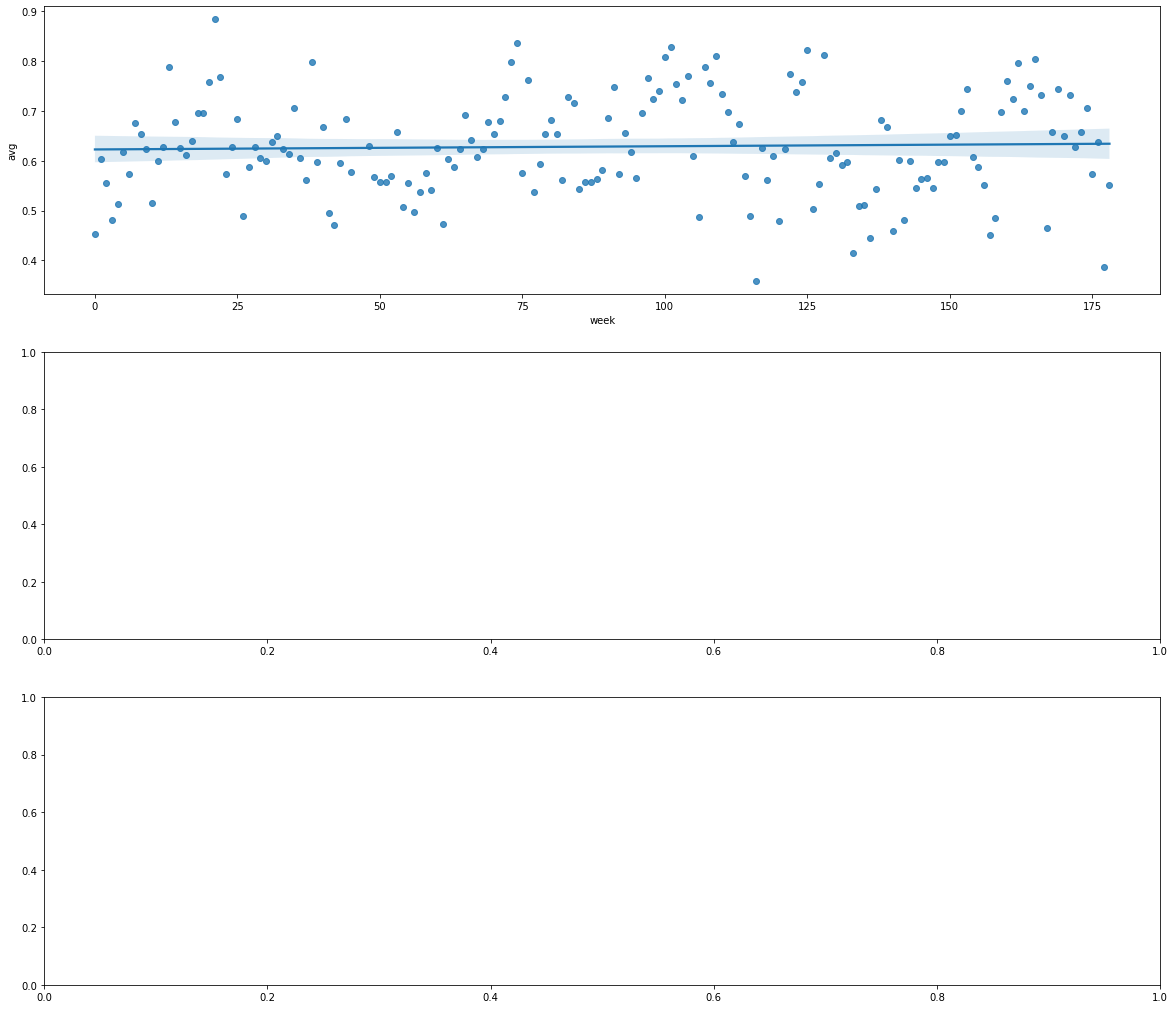

In [41]:
RHd_train, RHd_test, RHa_train, RHa_test = train_test_split(regressionRH.week, regressionRH.avg, test_size=0.2, random_state=42)

RHa_train_arr = RHa_train.array
RHa_test_arr = RHa_test.array
RHd_train_arr = RHd_train.array.to_numpy().reshape(-1,1)
RHd_test_arr = RHd_test.array.to_numpy().reshape(-1,1)


RHa_train_arr

RHreg = LinearRegression().fit(RHd_train_arr,RHa_train_arr)

fitted_RHtrain_avg = RHreg.predict(RHd_train_arr)
fitted_RHtest_avg = RHreg.predict(RHd_test_arr)

#Visualisation


In [57]:
len(MSdata_post_pandemic)
(81+95)

176

<AxesSubplot:xlabel='week', ylabel='avg'>

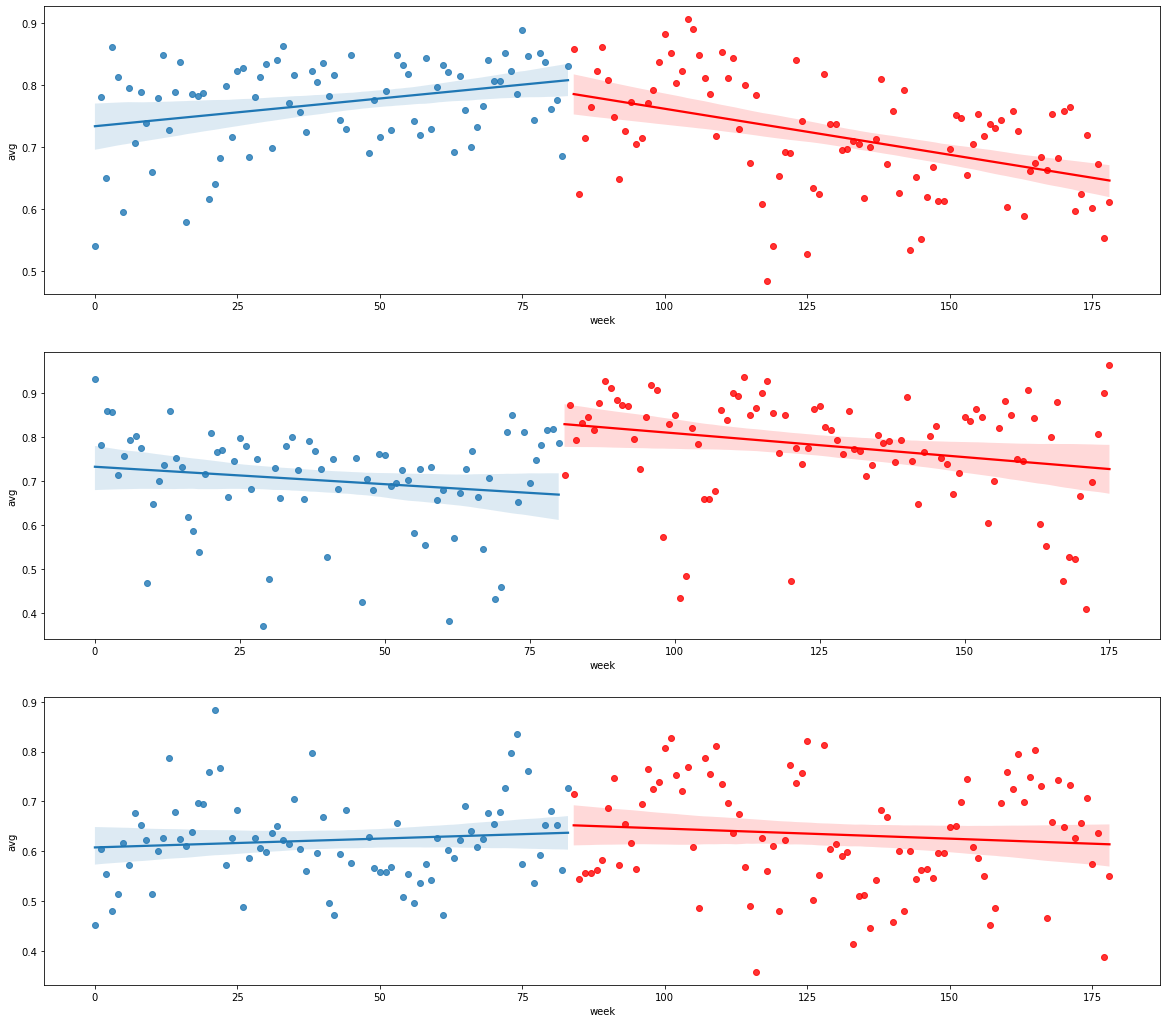

In [60]:
PRdata_pre_pandemic = PR_weekly_avg[PR_weekly_avg.index < '2020-03-15']
dictPRpre = {'week': range(84), 'avg': PRdata_pre_pandemic.values}
regressionPRpre = pd.DataFrame(data=dictPRpre)
regressionPRpre = regressionPRpre.dropna()
PRdata_post_pandemic = PR_weekly_avg[PR_weekly_avg.index >= '2020-03-15']
dictPRpost = {'week': range(84, 179), 'avg': PRdata_post_pandemic.values}
regressionPRpost = pd.DataFrame(data=dictPRpost)
regressionPRpost = regressionPRpost.dropna()



MSdata_pre_pandemic = MS_weekly_avg[MS_weekly_avg.index < '2020-03-15']
dictMSpre = {'week': range(81), 'avg': MSdata_pre_pandemic.values}
regressionMSpre = pd.DataFrame(data=dictMSpre)
regressionMSpre = regressionMSpre.dropna()
MSdata_post_pandemic = MS_weekly_avg[MS_weekly_avg.index >= '2020-03-15']
dictMSpost = {'week': range(81, 176), 'avg': MSdata_post_pandemic.values}
regressionMSpost = pd.DataFrame(data=dictMSpost)
regressionMSpost = regressionMSpost.dropna()


RHdata_pre_pandemic = RH_weekly_avg[RH_weekly_avg.index < '2020-03-15']
dictRHpre = {'week': range(84), 'avg': RHdata_pre_pandemic.values}
regressionRHpre = pd.DataFrame(data=dictRHpre)
regressionRHpre = regressionRHpre.dropna()
RHdata_post_pandemic = RH_weekly_avg[RH_weekly_avg.index >= '2020-03-15']
dictRHpost = {'week': range(84, 179), 'avg': RHdata_post_pandemic.values}
regressionRHpost = pd.DataFrame(data=dictRHpost)
regressionRHpost = regressionRHpost.dropna()

regFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.regplot(ax=axes[0], x=regressionPRpre.week,y= regressionPRpre.avg)
sns.regplot(ax=axes[0], x=regressionPRpost.week,y= regressionPRpost.avg, color = 'red')
sns.regplot(ax=axes[1], x=regressionMSpre.week,y= regressionMSpre.avg)
sns.regplot(ax=axes[1], x=regressionMSpost.week,y= regressionMSpost.avg, color = 'red')
sns.regplot(ax=axes[2], x=regressionRHpre.week,y= regressionRHpre.avg)
sns.regplot(ax=axes[2], x=regressionRHpost.week,y= regressionRHpost.avg, color = 'red')

In [50]:
len(PRdata_pre_pandemic)

84